In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import lmdiag
import wooldridge
from statsmodels.stats.api import het_breuschpagan, het_white
from seaborn import residplot
from statsmodels.stats.outliers_influence import reset_ramsey

                            OLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.391
No. Observations:                 366   F-statistic:                     39.98
Covariance Type:            nonrobust   Prob (F-statistic):           3.41e-37
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.230      6.397      0.000       1.018       1.922
sat            0.0011      0.000      6.389      0.000       0.001       0.001
hsperc        -0.0086      0.001     -6.906      0.000      -0.011      -0.006
tothrs         0.0025      0.001      3.426      0.001       0.001       0.004
female         0.3034      0.059      5.141      0.000       0.187       0.420
black         -0.1283      0.147     -0.870      0.3

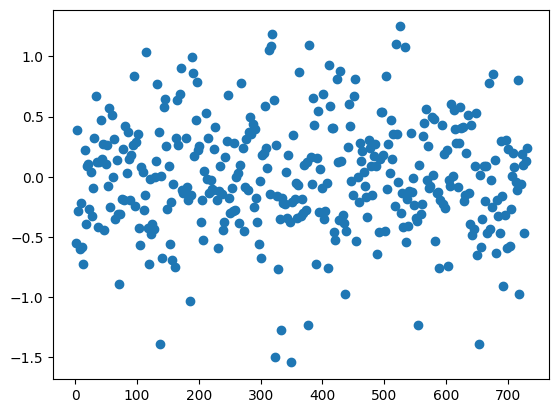

In [3]:
gpa3 = wooldridge.data('gpa3').query('spring == 1')  # 春学期だけを抽出
# wooldridge.data('gpa3', description=True)

form_ols = 'cumgpa ~ sat + hsperc + tothrs + female + black + white'

mod_ols = ols(form_ols, data=gpa3)
res_ols = mod_ols.fit()

print(res_ols.summary(slim=True))
plt.plot(res_ols.resid, 'o')

                            OLS Regression Results                            
Dep. Variable:                 cumgpa   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.391
No. Observations:                 366   F-statistic:                     38.28
Covariance Type:                  HC3   Prob (F-statistic):           7.04e-36
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.229      6.409      0.000       1.019       1.921
sat            0.0011      0.000      5.840      0.000       0.001       0.002
hsperc        -0.0086      0.001     -5.934      0.000      -0.011      -0.006
tothrs         0.0025      0.001      3.342      0.001       0.001       0.004
female         0.3034      0.060      5.054      0.000       0.185       0.422
black         -0.1283      0.128     -1.001      0.3

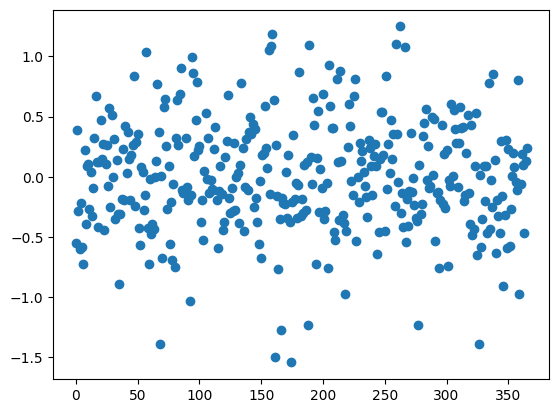

In [7]:
res_robust = res_ols.get_robustcov_results(cov_type='HC3', use_t=True)

print(res_robust.summary(slim=True))

res_HC3 = ols(form_ols, data=gpa3).fit(cov_type='HC3', use_t=True)

print(res_HC3.summary().tables[1])



plt.plot(res_robust.resid, 'o')

In [4]:
hprice1 = wooldridge.data('hprice1')
form_h = 'price ~ lotsize + sqrft + bdrms'

res_h = ols(form_h, data=hprice1).fit()

print(res_h.summary().tables[1])

het_breuschpagan(res_h.resid, res_h.model.exog)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.462     -80.385      36.844
lotsize        0.0021      0.001      3.220      0.002       0.001       0.003
sqrft          0.1228      0.013      9.275      0.000       0.096       0.149
bdrms         13.8525      9.010      1.537      0.128      -4.065      31.770


(14.092385504350311,
 0.0027820595556889943,
 5.338919363241449,
 0.002047744420935996)

In [8]:
hypotheses = 'black = white = 0'

f_test_ols = res_ols.f_test(hypotheses)

f_test_ols.summary()

f_test_HC3 = res_HC3.f_test(hypotheses)

f_test_HC3.summary()

'<F test: F=0.6724692957656611, p=0.5110883633440992, df_denom=359, df_num=2>'

In [9]:
hprice1 = wooldridge.data('hprice1')
wooldridge.data('hprice1', description=True)

name of dataset: hprice1
no of variables: 10
no of observations: 88

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| price    | house price, $1000s          |
| assess   | assessed value, $1000s       |
| bdrms    | number of bdrms              |
| lotsize  | size of lot in square feet   |
| sqrft    | size of house in square feet |
| colonial | =1 if home is colonial style |
| lprice   | log(price)                   |
| lassess  | log(assess                   |
| llotsize | log(lotsize)                 |
| lsqrft   | log(sqrft)                   |
+----------+------------------------------+

Collected from the real estate pages of the Boston Globe during 1990.
These are homes that sold in the Boston, MA area.
